In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# save path to variable
climate_path = "CA042239T.csv"

# Read the climate data
climate_results = pd.read_csv(climate_path)

climate_results 

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
0,'042239',1887,1,.,.,.
1,'042239',1887,2,.,.,.
2,'042239',1887,3,.,.,.
3,'042239',1887,4,.,.,.
4,'042239',1887,5,.,.,.
...,...,...,...,...,...,...
1531,'042239',2014,8,83.2,68.3,53.4
1532,'042239',2014,9,82.5,66.7,50.8
1533,'042239',2014,10,75.4,58.6,41.8
1534,'042239',2014,11,62.3,49.1,35.8


In [3]:
# checking for NAs
climate_results.isna().sum() 

State_id      0
YEAR          0
Month         0
TMAX (F)      0
TMEAN (F)     0
TMIN (F)      0
dtype: int64

In [4]:
# checking data types
climate_results.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)      object
TMEAN (F)     object
TMIN (F)      object
dtype: object

In [5]:
# checking columns
climate_results.columns

Index(['State_id  ', 'YEAR  ', 'Month  ', 'TMAX (F)', 'TMEAN (F)',
       'TMIN (F) '],
      dtype='object')

In [6]:
# revising extra spaces out of column names
dict = {'State_id  ': 'State_id',
        'YEAR  ': 'YEAR',
        'Month  ': 'Month',
        'TMIN (F) ': 'TMIN (F)'}

climate_redux = climate_results.rename(columns=dict)
climate_redux.columns

Index(['State_id', 'YEAR', 'Month', 'TMAX (F)', 'TMEAN (F)', 'TMIN (F)'], dtype='object')

In [7]:
# Grabbing data between years 1961 - 1990
climate_results_sixtyone = climate_redux[climate_redux['YEAR'].between(1961, 1990)]
climate_results_sixtyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
888,'042239',1961,1,53.8,40.2,26.7
889,'042239',1961,2,55.7,42.2,28.8
890,'042239',1961,3,53,42.4,31.7
891,'042239',1961,4,64.3,49.7,35
892,'042239',1961,5,64.2,50.8,37.4
...,...,...,...,...,...,...
1243,'042239',1990,8,81.9,67,52
1244,'042239',1990,9,79.6,64.3,48.9
1245,'042239',1990,10,73.7,56.2,38.7
1246,'042239',1990,11,58.9,45.9,32.8


In [12]:
# Using .loc as alternate method
sixtyone = climate_redux.loc[(climate_redux.YEAR > 1960) & (climate_redux.YEAR < 1991), :]
sixtyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
888,'042239',1961,1,53.8,40.2,26.7
889,'042239',1961,2,55.7,42.2,28.8
890,'042239',1961,3,53,42.4,31.7
891,'042239',1961,4,64.3,49.7,35
892,'042239',1961,5,64.2,50.8,37.4
...,...,...,...,...,...,...
1243,'042239',1990,8,81.9,67,52
1244,'042239',1990,9,79.6,64.3,48.9
1245,'042239',1990,10,73.7,56.2,38.7
1246,'042239',1990,11,58.9,45.9,32.8


In [13]:
# adjust TMAX format to float
import warnings
warnings.filterwarnings("ignore")
sixtyone['TMAX (F)'] = sixtyone['TMAX (F)'].astype('float')
sixtyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)     object
TMIN (F)      object
dtype: object

In [14]:
# adjust TMEAN format to float
sixtyone['TMEAN (F)'] = sixtyone['TMEAN (F)'].astype('float')
sixtyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)      object
dtype: object

In [15]:
# adjust TMIN format to float
sixtyone['TMIN (F)'] = sixtyone['TMIN (F)'].astype('float')
sixtyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)     float64
dtype: object

In [16]:
# creating first pivot table for TMAX - 2.5a
pivot_tmax = sixtyone.pivot_table(values='TMAX (F)', index='YEAR', columns='Month')
pivot_tmax

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,53.8,55.7,53.0,64.3,64.2,81.3,87.6,85.0,76.3,69.3,54.0,48.9
1962,48.2,47.0,46.7,68.3,63.6,74.9,83.8,88.1,82.5,70.6,64.3,54.9
1963,46.1,61.8,53.7,55.0,68.3,70.6,85.7,83.3,80.1,70.1,58.5,54.4
1964,48.7,52.2,49.7,55.6,62.3,74.9,86.8,85.3,80.4,75.3,51.9,50.8
1965,50.7,52.4,49.9,56.7,66.6,69.8,84.4,84.9,73.3,76.8,59.1,46.9
1966,46.9,46.2,58.7,66.5,72.5,78.4,84.7,86.6,80.5,69.6,58.9,50.2
1967,51.0,55.0,54.2,47.8,65.0,70.9,86.6,86.5,74.8,74.4,61.4,43.3
1968,47.6,57.0,55.7,59.5,67.6,76.0,83.8,78.9,78.9,69.4,58.6,47.0
1969,50.8,44.0,52.6,61.7,69.5,73.8,83.4,89.3,81.4,65.6,57.0,58.1


In [17]:
# creating third pivot table for TMIN - 2.5b
pivot_tmin = sixtyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')
pivot_tmin

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,26.7,28.8,31.7,35.0,37.4,52.4,54.6,53.2,41.4,36.7,28.7,27.3
1962,27.1,30.4,27.1,39.0,38.3,44.3,50.1,53.5,45.8,35.6,28.5,25.5
1963,24.9,33.7,28.4,29.4,39.8,44.2,53.2,52.8,46.7,40.1,32.5,24.8
1964,25.8,24.4,25.3,31.0,37.3,43.1,52.4,52.4,43.1,42.9,27.8,32.0
1965,30.0,28.4,28.6,33.3,37.8,39.6,50.8,52.1,40.4,38.6,33.3,29.0
1966,25.4,25.9,31.6,37.0,39.9,45.2,52.0,53.8,45.9,37.5,32.6,31.7
1967,30.2,29.9,32.9,28.2,39.4,42.2,54.3,55.1,48.7,36.1,32.6,23.3
1968,27.1,34.8,31.3,31.9,38.6,47.6,54.2,49.8,45.7,37.4,31.4,23.4
1969,31.6,28.4,29.2,38.0,37.0,44.5,52.7,55.0,49.5,35.1,36.2,26.6


In [18]:
# creating second pivot table for TMEAN - 2.5c
pivot_tmean = sixtyone.pivot_table(values='TMEAN (F)', index='YEAR', columns='Month')
pivot_tmean

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,40.2,42.2,42.4,49.7,50.8,66.8,71.1,69.1,58.9,53.0,41.4,38.1
1962,37.6,38.7,36.9,53.7,51.0,59.6,67.0,70.8,64.1,53.1,46.4,40.2
1963,35.5,47.8,41.0,42.2,54.1,57.4,69.5,68.1,63.4,55.1,45.5,39.6
1964,37.2,38.3,37.5,43.3,49.8,59.0,69.6,68.8,61.8,59.1,39.8,41.4
1965,40.4,40.4,39.2,45.0,52.2,54.7,67.6,68.5,56.9,57.7,46.2,38.0
1966,36.2,36.1,45.1,51.8,56.2,61.8,68.4,70.2,63.2,53.5,45.8,40.9
1967,40.6,42.4,43.6,38.0,52.2,56.6,70.5,70.8,61.7,55.3,47.0,33.3
1968,37.3,45.9,43.5,45.7,53.1,61.8,69.0,64.3,62.3,53.4,45.0,35.2
1969,41.2,36.2,40.9,49.8,53.3,59.2,68.1,72.2,65.5,50.4,46.6,42.3


In [19]:
# calculate August climatology of TMAX - 2.6a
pivot_tmax[8].mean()

83.55

In [20]:
# calculate August climatology of TMIN - 2.6a
pivot_tmin[8].mean()

52.959999999999994

In [21]:
# calculate August climatology of TMEAN - 2.6a
pivot_tmean[8].mean()

68.25333333333333

In [22]:
# compute January standard deviation of TMAX - 2.6b
pivot_tmax[1].std()

3.326355915737358

In [23]:
# compute January standard deviation of TMIN - 2.6b
pivot_tmin[1].std()

2.7185696036068627

In [24]:
# compute January standard deviation of TMEAN - 2.6b
pivot_tmean[1].std()

2.5760278609187997

In [25]:
# Grabbing data for 1951 to 2010 - 2.7a
fiftyone = climate_redux.loc[(climate_redux.YEAR > 1950) & (climate_redux.YEAR < 2011), :]
fiftyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
768,'042239',1951,1,48,37.7,27.4
769,'042239',1951,2,49.3,39.1,29
770,'042239',1951,3,53,42.4,31.8
771,'042239',1951,4,56.7,46.3,36
772,'042239',1951,5,66,54.1,42.2
...,...,...,...,...,...,...
1483,'042239',2010,8,84,69.2,54.3
1484,'042239',2010,9,82.5,64.2,45.8
1485,'042239',2010,10,66.5,54,41.6
1486,'042239',2010,11,55.8,43.9,32


In [26]:
# adjust TMAX format to float
fiftyone['TMAX (F)'] = fiftyone['TMAX (F)'].astype('float')
fiftyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)     object
TMIN (F)      object
dtype: object

In [27]:
# adjust TMEAN format to float
fiftyone['TMEAN (F)'] = fiftyone['TMEAN (F)'].astype('float')
fiftyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)      object
dtype: object

In [28]:
# adjust TMIN format to float
fiftyone['TMIN (F)'] = fiftyone['TMIN (F)'].astype('float')
fiftyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)     float64
dtype: object

In [29]:
# creating pivot table for TMIN 1951 to 2010 - 2.7a
pivot_tmin_fiftyone = fiftyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')
pivot_tmin_fiftyone

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1951,27.4,29.0,31.8,36.0,42.2,43.3,56.5,48.1,46.1,37.9,31.7,26.9
1952,27.9,30.2,28.6,34.8,45.6,43.4,51.9,54.3,48.9,39.7,28.8,26.8
1953,33.7,27.2,30.1,33.1,34.6,45.9,57.5,50.4,44.8,37.7,34.8,29.2
1954,25.9,31.5,29.6,39.1,39.9,45.8,56.1,47.4,48.4,37.4,32.9,27.2
1955,21.6,26.8,32.0,32.8,37.4,44.7,49.5,53.0,44.6,39.5,32.2,32.1
1956,29.8,25.2,30.8,32.1,39.2,47.1,53.1,47.6,49.0,33.5,31.9,29.9
1957,29.8,32.4,34.2,33.8,37.9,49.6,54.9,52.9,46.6,38.9,29.5,30.1
1958,29.2,33.3,29.7,37.0,46.3,49.5,53.5,53.9,50.1,38.8,29.1,30.3
1959,28.4,26.1,33.6,37.6,38.2,48.6,58.6,51.2,48.3,38.4,35.7,31.5


In [30]:
pivot_tmin_fiftyone[1]

YEAR
1951    27.4
1952    27.9
1953    33.7
1954    25.9
1955    21.6
1956    29.8
1957    29.8
1958    29.2
1959    28.4
1960    21.0
1961    26.7
1962    27.1
1963    24.9
1964    25.8
1965    30.0
1966    25.4
1967    30.2
1968    27.1
1969    31.6
1970    28.6
1971    25.4
1972    24.2
1973    24.9
1974    27.2
1975    27.9
1976    27.0
1977    29.6
1978    31.6
1979    26.6
1980    34.6
1981    31.6
1982    28.3
1983    30.6
1984    32.9
1985    29.6
1986    33.4
1987    26.7
1988    28.5
1989    26.6
1990    28.0
1991    29.1
1992    28.6
1993    31.1
1994    30.1
1995    25.9
1996    30.9
1997    34.3
1998    31.0
1999    31.3
2000    30.9
2001    27.4
2002    26.0
2003    33.5
2004    28.5
2005    32.4
2006    29.4
2007    26.0
2008    29.8
2009    32.8
2010    30.9
Name: 1, dtype: float64

In [31]:
pivot_tmin_fiftyone.index

Int64Index([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='YEAR')

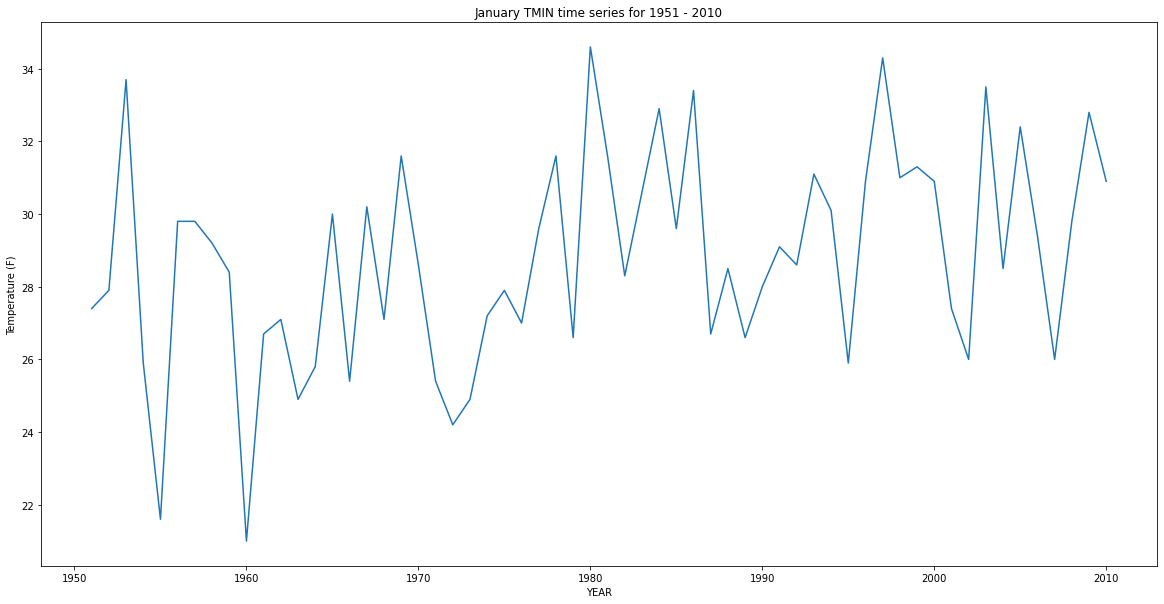

In [32]:
# plotting January TMIN time series for 1951 to 2010 - 2.7a
pivot_tmin_fiftyone[1].plot(figsize=(20,10))
plt.ylabel("Temperature (F)")
plt.title("January TMIN time series for 1951 - 2010");


# x = pivot_tmin_fiftyone.index
# y = pivot_tmin_fiftyone[1]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# fig1, ax1 = plt.subplots(figsize=(12,8))
# plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(20,36),fontsize=15,color="red")



# plt.show();

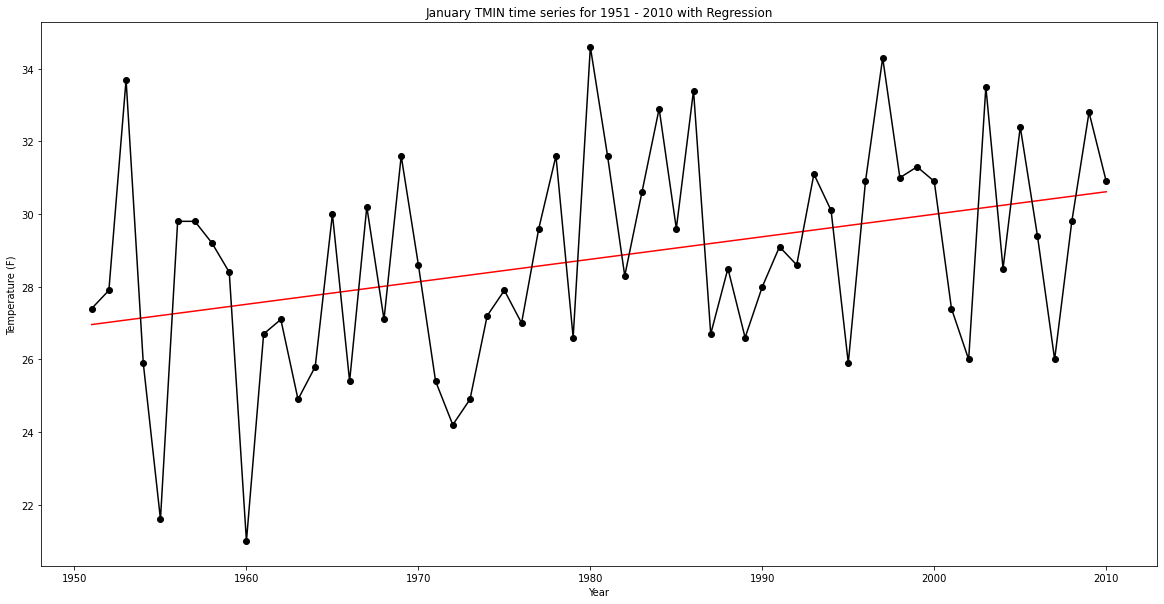

In [49]:
from sklearn.linear_model import LinearRegression

t = np.linspace(1951, 2010, 60)
T = pivot_tmin_fiftyone[1]
lm = LinearRegression()
lm.fit(t.reshape(-1,1), T)
predictions = lm.predict(t.reshape(-1, 1))

# t = np.linspace(1950, 2010, 60)
# T = pivot_tmin_fiftyone[1]
# lm = LinearRegression()
# lm.fit(t.reshape(-1,1), T)
# predictions = lm.predict(t.reshape(-1, 1))

plt.figure(figsize=(20,10))
plt.plot(t, predictions, '-r')
plt.plot(t,T,"-o", color="black")
plt.title("January TMIN time series for 1951 - 2010 with Regression")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.show()  

In [85]:
# t

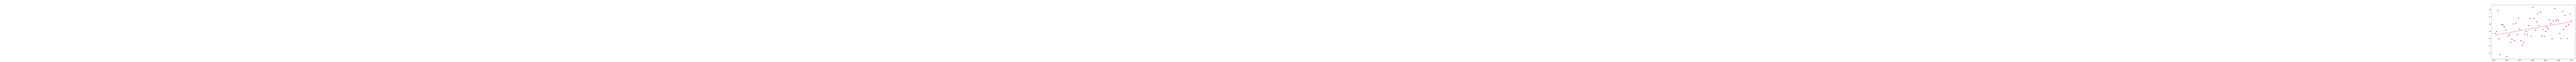

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(t, T)
regress_values = t * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.scatter(t, T, color="r", marker="o", edgecolors="black")
plt.plot(t,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()

In [79]:
line_eq

'y = 0.06x + -93.91'

In [43]:
# Adding linear regression for 1951 to 2010 - 2.7b(i)
fiftyone = climate_redux.loc[(climate_redux.YEAR > 1950) & (climate_redux.YEAR < 2011), :]
fiftyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
768,'042239',1951,1,48,37.7,27.4
769,'042239',1951,2,49.3,39.1,29
770,'042239',1951,3,53,42.4,31.8
771,'042239',1951,4,56.7,46.3,36
772,'042239',1951,5,66,54.1,42.2
...,...,...,...,...,...,...
1483,'042239',2010,8,84,69.2,54.3
1484,'042239',2010,9,82.5,64.2,45.8
1485,'042239',2010,10,66.5,54,41.6
1486,'042239',2010,11,55.8,43.9,32


In [81]:
# save path to variable
jones_path = "JonesGlobalT.csv"

# Read the climate data
jones_results = pd.read_csv(jones_path)

jones_results 

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1,1850,-0.702,-0.284,-0.732,-0.570,-0.325,-0.213,-0.128,-0.233,-0.444,-0.452,-0.190,-0.268,-0.375
1,2,1851,-0.303,-0.362,-0.485,-0.445,-0.302,-0.189,-0.215,-0.153,-0.108,-0.063,-0.030,-0.067,-0.223
2,3,1852,-0.308,-0.477,-0.505,-0.559,-0.209,-0.038,-0.016,-0.195,-0.125,-0.216,-0.187,0.083,-0.224
3,4,1853,-0.177,-0.330,-0.318,-0.352,-0.268,-0.179,-0.059,-0.148,-0.409,-0.359,-0.256,-0.444,-0.271
4,5,1854,-0.360,-0.280,-0.284,-0.349,-0.230,-0.215,-0.228,-0.163,-0.115,-0.188,-0.369,-0.232,-0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,2011,0.313,0.327,0.425,0.480,0.384,0.489,0.510,0.488,0.454,0.453,0.347,0.401,0.422
162,163,2012,0.306,0.302,0.358,0.575,0.574,0.557,0.510,0.536,0.553,0.556,0.554,0.275,0.470
163,164,2013,0.450,0.486,0.401,0.439,0.520,0.487,0.514,0.533,0.535,0.497,0.639,0.508,0.499
164,165,2014,0.523,0.313,0.561,0.657,0.599,0.618,0.541,0.666,0.589,0.626,0.489,0.634,0.567


In [82]:
jones_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  166 non-null    int64  
 1   YEAR        166 non-null    int64  
 2   JAN         166 non-null    float64
 3   FEB         166 non-null    float64
 4   MAR         166 non-null    float64
 5   APR         166 non-null    float64
 6   MAY         166 non-null    float64
 7   JUN         166 non-null    float64
 8   JUL         166 non-null    float64
 9   AUG         166 non-null    float64
 10  SEP         166 non-null    float64
 11  OCT         166 non-null    float64
 12  NOV         166 non-null    float64
 13  DEC         166 non-null    float64
 14  ANNUAL      166 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 19.6 KB


In [83]:
jones_results.columns

Index(['Unnamed: 0', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')

In [84]:
jones_eighty = jones_results.loc[(jones_results.YEAR > 1879) & (jones_results.YEAR < 2016), :]
jones_eighty

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
30,31,1880,-0.064,-0.176,-0.105,-0.147,-0.241,-0.308,-0.250,-0.115,-0.233,-0.387,-0.408,-0.295,-0.229
31,32,1881,-0.362,-0.238,-0.187,-0.133,-0.030,-0.229,-0.151,-0.128,-0.244,-0.284,-0.341,-0.138,-0.206
32,33,1882,0.114,-0.009,-0.053,-0.283,-0.373,-0.317,-0.185,-0.221,-0.155,-0.337,-0.313,-0.463,-0.215
33,34,1883,-0.409,-0.322,-0.342,-0.394,-0.253,-0.119,-0.195,-0.209,-0.278,-0.381,-0.305,-0.324,-0.295
34,35,1884,-0.418,-0.217,-0.459,-0.529,-0.392,-0.413,-0.424,-0.410,-0.342,-0.322,-0.558,-0.416,-0.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,2011,0.313,0.327,0.425,0.480,0.384,0.489,0.510,0.488,0.454,0.453,0.347,0.401,0.422
162,163,2012,0.306,0.302,0.358,0.575,0.574,0.557,0.510,0.536,0.553,0.556,0.554,0.275,0.470
163,164,2013,0.450,0.486,0.401,0.439,0.520,0.487,0.514,0.533,0.535,0.497,0.639,0.508,0.499
164,165,2014,0.523,0.313,0.561,0.657,0.599,0.618,0.541,0.666,0.589,0.626,0.489,0.634,0.567
